# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING


## 
Objective


This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis
## .
Datase
t:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:


## importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration and Preprocessing:

### •	Load the dataset 

In [3]:
df=pd.read_csv("adult_with_headers.csv")


In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.shape

(32561, 15)

### summary statitics

In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### checking for data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### checking for missing values

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### checking for duplicates

In [10]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### removing duplicates

In [11]:
df=df.drop_duplicates()

In [12]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [13]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [14]:
df['income'].value_counts()

income
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

### target feature value is imbalance

<Axes: xlabel='income', ylabel='count'>

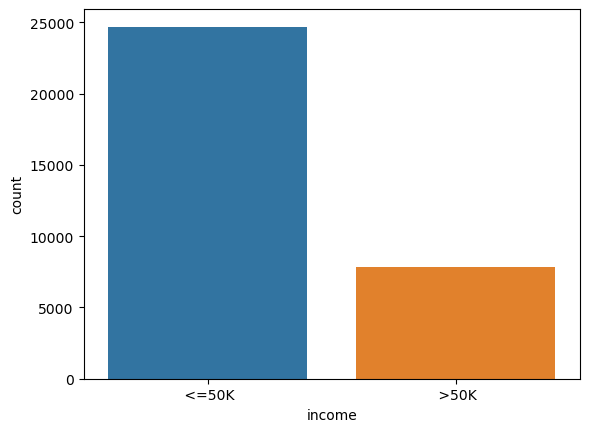

In [15]:
sns.countplot(data=df,x='income')

## divide the features in numerical feature and categorical features

### numerical features

In [16]:
numerical_feature=[i for i in df.columns if df[i].dtype!='O']
numerical_feature

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### visualization of numerical feature

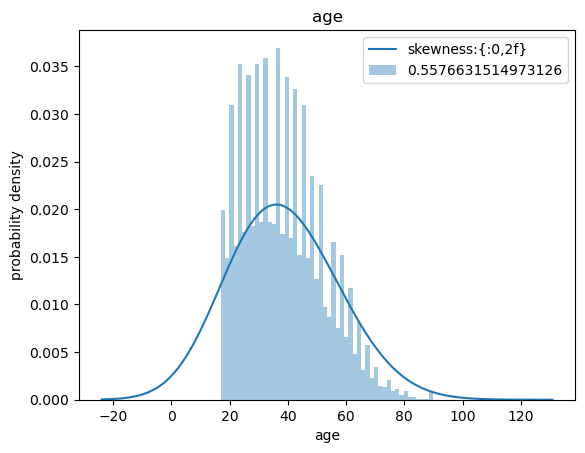

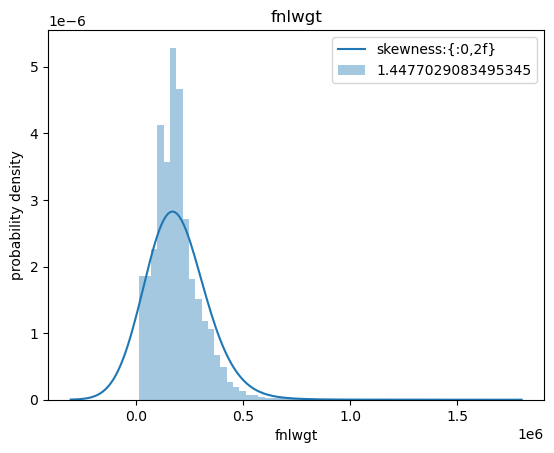

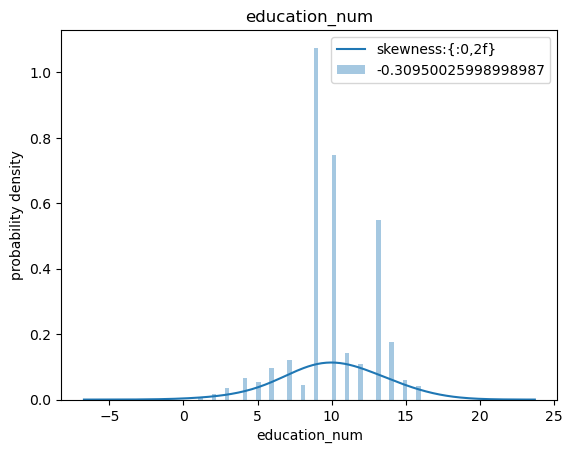

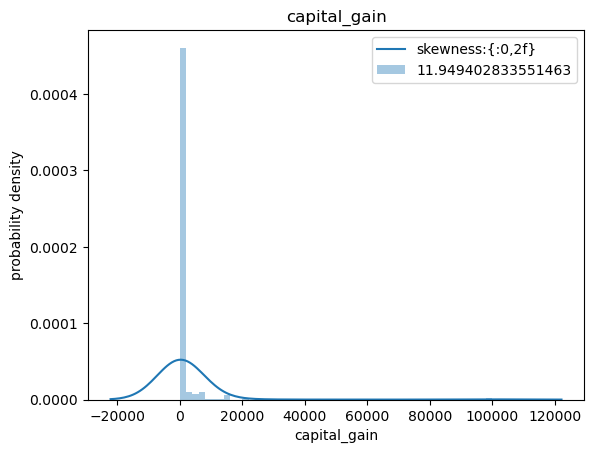

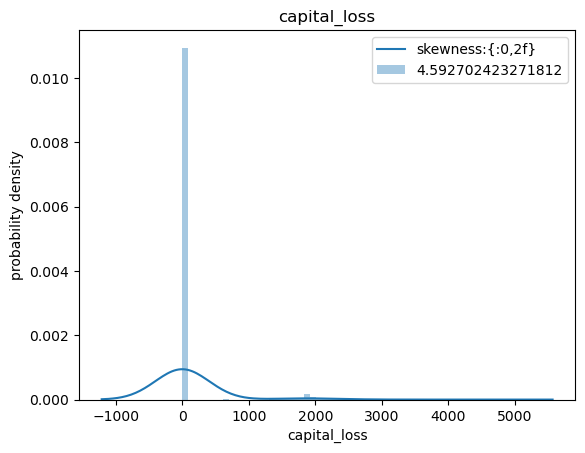

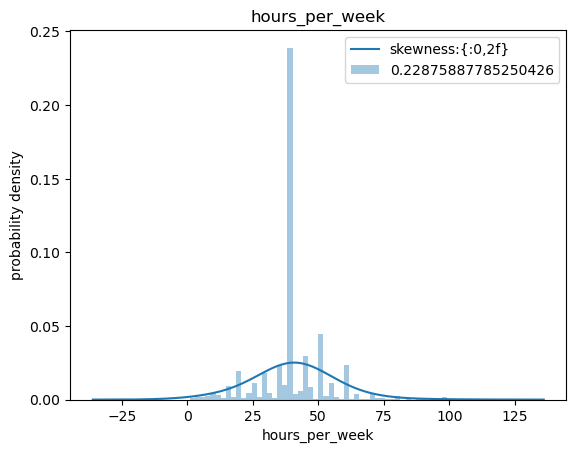

In [17]:
for feature in numerical_feature:
    bar=sns.distplot(df[feature],kde_kws={'bw':1})
    bar.legend(['skewness:{:0,2f}',format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('probability density')
    plt.title(feature)
    plt.show()

### observation :
 in this numerical features visual we observed that the 'age' feature is  0.55  right skewwed, and feature 'fnlwgt' is 1.44 right skewwed

### log transformation for reduce skewwness

In [18]:
df['age']=np.log(df['age'])
df['fnlwgt']=np.log(df['fnlwgt'])

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [20]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_feature] = standard_scaler.fit_transform(df_standard_scaled[numerical_feature])

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_feature] = min_max_scaler.fit_transform(df_min_max_scaled[numerical_feature])

## categorical features

In [21]:
categorical_feature=[i for i in df.columns if df[i].dtype=='O']
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

### handling categorical data

In [22]:
for feature in categorical_feature:
    print(df[feature].value_counts())
    print('\n\n')

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64



education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64



marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64



occupation
 Prof-specialty       4136
 Craf

### observation:
 we observed some categorical features like: ['workclass','occupation''native_country'] contains missing values as "?" we have to handle those missing values by replacing it   

## handle missing values in categorical features

In [23]:

df['workclass'].mode()[0]

' Private'

In [24]:
df['occupation'].mode()[0]

' Prof-specialty'

In [25]:
df['native_country'].mode()[0]

' United-States'

In [26]:
# we replace this missing values  by mode 
df['workclass']=df['workclass'].str.replace('?',' Private')
df['occupation']=df['occupation'].str.replace('?','Prof-specialty')
df['native_country']=df['native_country'].str.replace('?','United-States')


#### in categorical features we have more categories so we have to reduce categories

In [27]:
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [28]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       41
income                2
dtype: int64

In [29]:
# education feature
df['education']=df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',regex=True)
df['education']=df['education'].replace([ 'Prof-school','Some-college','Assoc-voc','Assoc-acdm'],'Higher',regex=True)

In [30]:
df['education'].value_counts()

education
 HS-grad      10494
 Higher       10307
 Bachelors     5353
 School        4248
 Masters       1722
 Doctorate      413
Name: count, dtype: int64

In [31]:
# marital status
df['marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Other',inplace=True,regex=True)

In [32]:
df['marital_status'].value_counts()

marital_status
 Married-civ-spouse    14970
 Never-married         10667
 Other                  6877
 Married-AF-spouse        23
Name: count, dtype: int64

### 2. Encoding Techniques

#### 
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.                

In [33]:
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

#### we apply one hot encoding for [marital_status,sex] features


In [34]:
df=pd.get_dummies(data=df,columns=['marital_status','sex'],dtype=int)


#### and label encoding for [workclass,education,occupation,realtionship,race,native_country,'income']

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
columns_to_encode = ['workclass', 'education', 'occupation', 'relationship', 'race', 'native_country','income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [37]:
df

,age,workclass,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,sex_ Female,sex_ Male
0,3.663562,7,11.258240,0,13,0,1,4,2174,0,40,38,0,0,0,1,0,0,1
1,3.912023,6,11.330336,0,13,3,0,4,0,0,13,38,0,0,1,0,0,0,1
2,3.637586,4,12.281393,2,9,5,1,4,0,0,40,38,0,0,0,0,1,0,1
3,3.970292,4,12.366153,5,7,5,0,2,0,0,40,38,0,0,1,0,0,0,1
4,3.332205,4,12.732011,0,13,9,5,2,0,0,40,4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.295837,4,12.458006,3,12,12,5,4,0,0,38,38,0,0,1,0,0,1,0
32557,3.688879,4,11.947134,2,9,6,0,4,0,0,40,38,1,0,1,0,0,0,1
32558,4.060443,4,11.931044,2,9,0,4,4,0,0,40,38,0,0,0,0,1,1,0
32559,3.091042,4,12.213495,2,9,0,3,4,0,0,20,38,0,0,0,1,0,0,1


### One-Hot Encoding:
Pros: Does not assume ordinal relationships between categories. Cons: Can create high-dimensional data if there are many categories.
.

### Label Encoding:
Pros: Simple and efficient. Cons: Imposes ordinal relationships which may not exist, potentially misleading the model.

#### As income is target feature and it contains 2 categories so we use labelencoding because one hot encoding create 2 columns 

### spliting the data into x and y

In [38]:
X=df.drop('income',axis=1)

In [39]:
y=df['income']

### apply on logistic regression and check the accuracy with all features

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
LR=LogisticRegression(class_weight='balanced')

In [112]:
model=LR.fit(X_train,y_train)

In [113]:
LR.score(X_test,y_test)

0.7572218807621389

In [114]:
LR.score(X_train,y_train)

0.7635329824426601

## feature selection 

#### feature selection by SelectKbest

In [66]:
from sklearn.feature_selection import SelectKBest

In [73]:
best_feat = SelectKBest( k = 10)

In [74]:
best_feat.fit(X,y)

SelectKBest()

In [75]:
best_feat.transform(X)

array([[ 3.66356165, 13.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.91202301, 13.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.63758616,  9.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 4.06044301,  9.        ,  4.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 3.09104245,  9.        ,  3.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.95124372,  9.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ]])

In [76]:
best_feat.scores_

array([2.53928125e+03, 8.70768590e+01, 6.93867453e-02, 9.10740366e+02,
       4.12031333e+03, 3.88059099e+01, 2.18659410e+03, 1.68819063e+02,
       1.70801385e+03, 7.54012116e+02, 1.81153387e+03, 1.70011385e+01,
       4.73005773e+00, 8.01600992e+03, 3.66749942e+03, 1.05948485e+03,
       1.59176376e+03, 1.59176376e+03])

In [79]:
best_feat.pvalues_

array([0.00000000e+000, 1.10782942e-020, 7.92233447e-001, 2.40096015e-197,
       0.00000000e+000, 4.73831535e-010, 0.00000000e+000, 1.67109392e-038,
       0.00000000e+000, 4.02215941e-164, 0.00000000e+000, 3.74500313e-005,
       2.96470685e-002, 0.00000000e+000, 0.00000000e+000, 9.96089977e-229,
       0.00000000e+000, 0.00000000e+000])

In [78]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse', 'marital_status_ Never-married',
       'marital_status_ Other', 'sex_ Female', 'sex_ Male'],
      dtype='object')

In [80]:
df.corr()['income']

age                                   0.269067
workclass                             0.051665
fnlwgt                               -0.001460
education                            -0.165016
education_num                         0.335272
occupation                            0.034516
relationship                         -0.250948
race                                  0.071847
capital_gain                          0.223336
capital_loss                          0.150501
hours_per_week                        0.229658
native_country                        0.022853
income                                1.000000
marital_status_ Married-AF-spouse     0.012057
marital_status_ Married-civ-spouse    0.444609
marital_status_ Never-married        -0.318285
marital_status_ Other                -0.177588
sex_ Female                          -0.215969
sex_ Male                             0.215969
Name: income, dtype: float64

In [81]:
best_feat.get_params

<bound method BaseEstimator.get_params of SelectKBest()>

In [82]:
best_feat.n_features_in_

18

In [83]:
best_feat.feature_names_in_

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Never-married', 'marital_status_ Other',
       'sex_ Female', 'sex_ Male'], dtype=object)

In [85]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [86]:
best_feat1 = SelectKBest(score_func = chi2,k = 10)

In [87]:
best_feat1.fit_transform(X,y)

array([[ 0., 13.,  1., ...,  1.,  0.,  0.],
       [ 0., 13.,  0., ...,  0.,  0.,  0.],
       [ 2.,  9.,  1., ...,  0.,  1.,  0.],
       ...,
       [ 2.,  9.,  4., ...,  0.,  1.,  1.],
       [ 2.,  9.,  3., ...,  1.,  0.,  0.],
       [ 2.,  9.,  5., ...,  0.,  0.,  1.]])

In [88]:
best_feat1.scores_

array([8.51958501e+01, 4.76183499e+01, 2.30310891e-03, 7.70752543e+02,
       2.39903589e+03, 9.96668120e+01, 3.65821506e+03, 3.30121759e+01,
       8.21362443e+07, 1.37062169e+06, 6.46886542e+03, 1.70998658e+01,
       4.72631755e+00, 3.47259530e+03, 2.21554350e+03, 8.09251320e+02,
       1.01564438e+03, 5.01968535e+02])

In [89]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse', 'marital_status_ Never-married',
       'marital_status_ Other', 'sex_ Female', 'sex_ Male'],
      dtype='object')

In [90]:
X1 = df[['age','workclass','education','occupation','race','native_country','marital_status_ Married-AF-spouse','marital_status_ Other','sex_ Male']]

#### check model accuracy with selected features X1

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)

In [170]:
log_reg = LogisticRegression()

In [171]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [172]:
log_reg.score(X_test,y_test)

0.7611145257119443

In [173]:
log_reg.score(X_train,y_train)

0.7678594950603732

## RFE

In [97]:
from sklearn.feature_selection import RFE

In [99]:
best_feat_RFE = RFE(LR,n_features_to_select =10,verbose=1,step=1)

In [100]:
best_feat_RFE.fit_transform(X,y)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


array([[ 3.66356165, 11.25823965, 13.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.91202301, 11.33033587, 13.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.63758616, 12.28139345,  9.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 4.06044301, 11.93104352,  9.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 3.09104245, 12.21349503,  9.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.95124372, 12.57046225,  9.        , ...,  0.        ,
         1.        ,  0.        ]])

In [101]:
best_feat_RFE.ranking_

array([1, 5, 1, 4, 1, 7, 1, 1, 9, 8, 3, 6, 2, 1, 1, 1, 1, 1])

In [107]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse', 'marital_status_ Never-married',
       'marital_status_ Other', 'sex_ Female', 'sex_ Male'],
      dtype='object')

In [120]:
X2=df[['age','fnlwgt','education_num','relationship','race','marital_status_ Married-civ-spouse', 'marital_status_ Never-married',
       'marital_status_ Other', 'sex_ Female', 'sex_ Male']]

#### check model accuracy with selected features X2

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.2)

In [164]:
log_reg = LogisticRegression()

In [165]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [166]:
log_reg.score(X_test,y_test)

0.807160417947142

In [167]:
log_reg.score(X_train,y_train)

0.8229282723116524

###  Isolation Forest algorithm 

In [181]:
from sklearn.ensemble import IsolationForest


In [182]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [183]:
outliers = iso_forest.fit_predict(X)


In [186]:
df_cleaned = df[outliers == 1]

In [187]:
df_cleaned

,age,workclass,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,sex_ Female,sex_ Male
0,3.663562,7,11.258240,0,13,0,1,4,2174,0,40,38,0,0,0,1,0,0,1
1,3.912023,6,11.330336,0,13,3,0,4,0,0,13,38,0,0,1,0,0,0,1
2,3.637586,4,12.281393,2,9,5,1,4,0,0,40,38,0,0,0,0,1,0,1
3,3.970292,4,12.366153,5,7,5,0,2,0,0,40,38,0,0,1,0,0,0,1
5,3.610918,4,12.558777,4,14,3,5,4,0,0,40,38,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.295837,4,12.458006,3,12,12,5,4,0,0,38,38,0,0,1,0,0,1,0
32557,3.688879,4,11.947134,2,9,6,0,4,0,0,40,38,1,0,1,0,0,0,1
32558,4.060443,4,11.931044,2,9,0,4,4,0,0,40,38,0,0,0,0,1,1,0
32559,3.091042,4,12.213495,2,9,0,3,4,0,0,20,38,0,0,0,1,0,0,1


In [189]:
 pip install ppscore



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.6 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.6 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 215.1 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.



   ------ --------------------------------- 7.3/46.2 MB 2.4 MB/s eta 0:00:16
   ------ --------------------------------- 7.3/46.2 MB 2.4 MB/s eta 0:00:16
   ------ --------------------------------- 7.3/46.2 MB 2.4 MB/s eta 0:00:16
   ------ --------------------------------- 7.3/46.2 MB 2.4 MB/s eta 0:00:16
   ------ --------------------------------- 7.4/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 7.6/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 7.7/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 7.7/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 7.9/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 8.0/46.2 MB 2.3 MB/s eta 0:00:17
   ------ --------------------------------- 8.0/46.2 MB 2.3 MB/s eta 0:00:17
   ------- -------------------------------- 8.2/46.2 MB 2.3 MB/s eta 0:00:17
   ------- -------------------------------- 8.2/46.2 MB 2.3 MB/s eta 0:00:1

In [190]:
import ppscore as pps
pps_matrix = pps.matrix(data_cleaned)[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')
print(pps_matrix)

# Compare with correlation matrix
corr_matrix = data_cleaned.corr()
print(corr_matrix)

ModuleNotFoundError: No module named 'ppscore'

### Summary
In this assignment, we've performed data preprocessing (handling missing values, scaling), encoding techniques (One-Hot and Label Encoding), andfeature selection (using SelectKbest and RFE)and check for these selected feature model accuracy, feature selection (using Isolation Forest and PPS.






